In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

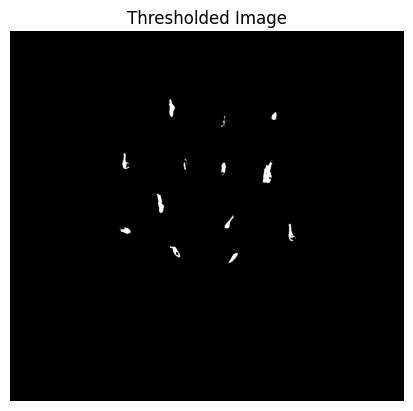

In [2]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread('sample(2).jpg')
original_image = image.copy()  # Make a copy of the original image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Adjust the threshold value manually
threshold_value = 100  # Set your desired threshold value here

# Perform thresholding with the adjusted threshold value
thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]

# Display the thresholded image using matplotlib
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')  # Turn off axis
plt.show()

In [3]:

# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


In [4]:

# Filter contours by area to count only white objects
white_objects_count = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10:  # You can adjust this threshold to filter out smaller objects
        white_objects_count += 1
        # Draw contour on the original image
        cv2.drawContours(original_image, [c], -1, (0, 255, 0), 2)


In [5]:
# Display the count
print("Number of white objects:", white_objects_count)


Number of white objects: 18


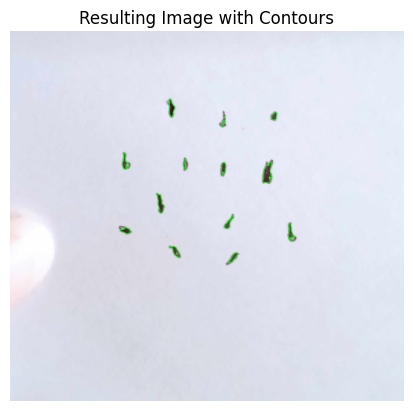

In [6]:

# Display the resulting image with contours
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Resulting Image with Contours')
plt.axis('off')
plt.show()